In [3]:
using DSP, JLD, PyPlot

In [14]:
using StatsBase, Statistics

In [4]:
arx="/home/karel/ElectroNeuroTools/JLDFiles/4AP/DatosLFP4APusadosPaper.jld"

"/home/karel/ElectroNeuroTools/JLDFiles/4AP/DatosLFP4APusadosPaper.jld"

In [9]:
bla=jldopen(arx)

Julia data file version 0.1.1: /home/karel/ElectroNeuroTools/JLDFiles/4AP/DatosLFP4APusadosPaper.jld

In [11]:
names(bla)

4-element Array{String,1}:
 "CSDALindenberg"
 "LFP"
 "kCSDCorrecta"
 "notacsd"

In [13]:
lfp=read(bla["LFP"]);

In [16]:
sigma=zeros(64,64)

for j=1:64, k=1:64
    sigma[j,k]=std(lfp[j,k,:])
end


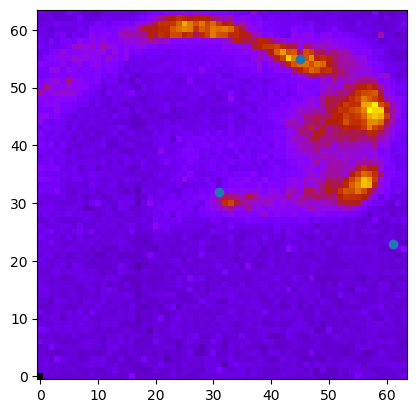

PyObject <matplotlib.collections.PathCollection object at 0x7f3e5c3a9050>

In [41]:
imshow(sigma, origin="lower", cmap="gnuplot")
scatter([45,31,61],[55,32,23])

In [21]:
lfp1=lfp[55,45,:]
lfp2=lfp[32,31,:]
lfp3=lfp[23,61,:];

In [24]:
nmax=size(lfp, 3)
freq=7022
tmax=nmax/freq;

In [26]:
rango=1:nmax
tango=rango./freq;

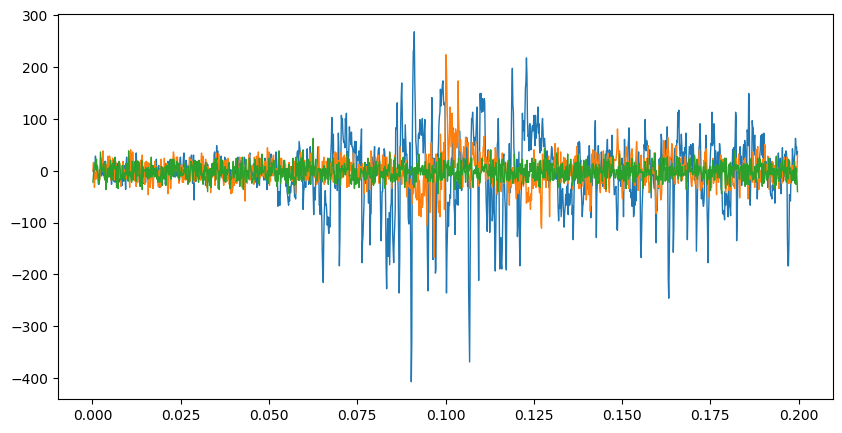

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3e464dbb10>

In [30]:
figure(figsize=(10,5))

plot(tango, lfp1, lw=1)
plot(tango, lfp2,lw=1)
plot(tango, lfp3,lw=1)


In [38]:
p1=periodogram(lfp1, fs=freq)
p2=periodogram(lfp2, fs=freq)
p3=periodogram(lfp3, fs=freq)

DSP.Periodograms.Periodogram{Float64,AbstractFFTs.Frequencies{Float64}}([0.5564055054118409, 0.03135083250952003, 0.016543204600087943, 0.01656850367619646, 0.027777101247648865, 0.01718361622484429, 0.06808802451863039, 0.033271742893744204, 0.03387171822763229, 0.008626481285819134  …  0.0806580988875159, 0.06054691042403609, 0.005909780541633409, 0.11558979195507647, 0.04091805121841243, 0.10388506992530105, 0.14251382037502175, 0.058705067650339, 0.06449300067298457, 0.10467434098036664], [0.0, 4.876388888888889, 9.752777777777778, 14.629166666666666, 19.505555555555556, 24.381944444444446, 29.258333333333333, 34.13472222222222, 39.01111111111111, 43.8875  …  3467.1125, 3471.988888888889, 3476.865277777778, 3481.741666666667, 3486.6180555555557, 3491.4944444444445, 3496.3708333333334, 3501.2472222222223, 3506.123611111111, 3511.0])

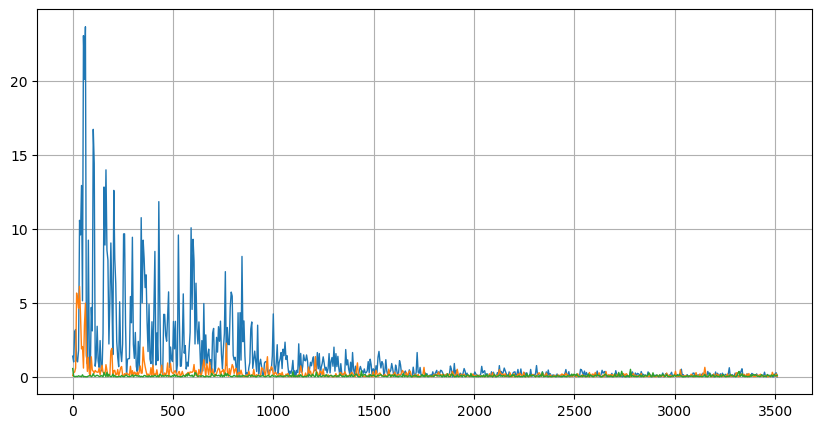

In [40]:
figure(figsize=(10,5))


plot(p1.freq ,p1.power,lw=1)

plot(p2.freq ,p2.power,lw=1)

plot(p3.freq ,p3.power,lw=1)



grid()

In [43]:
sp1=spectrogram(lfp1, fs=freq)

DSP.Periodograms.Spectrogram{Float64,AbstractFFTs.Frequencies{Float64}}([0.0877130749208446 0.014819676815825638 … 0.4398198805498709 0.15402691947408353; 0.039305473349638714 0.11450361637035239 … 2.270388553111893 2.983154438497684; … ; 0.04362044031701397 0.04516005377045477 … 0.3027053330664146 0.2465554707604133; 0.019944833886457194 0.015002634727893807 … 0.17594839347037228 0.31678416690738204], [0.0, 40.12571428571429, 80.25142857142858, 120.37714285714287, 160.50285714285715, 200.62857142857143, 240.75428571428574, 280.88, 321.0057142857143, 361.1314285714286  …  3129.8057142857147, 3169.9314285714286, 3210.057142857143, 3250.1828571428573, 3290.3085714285717, 3330.434285714286, 3370.5600000000004, 3410.6857142857143, 3450.8114285714287, 3490.937142857143], 0.012460837368271149:0.012532042153232698:0.1753773853602962)

In [49]:
sp1.freq
sp1.time
sp1.power

88×14 Array{Float64,2}:
 0.0877131    0.0148197   3.30133e-6   0.639138   …   0.43982      0.154027
 0.0393055    0.114504    0.0282622    0.972665       2.27039      2.98315
 0.149172     0.191148    0.0337289    0.596617       1.25569      0.675886
 0.0278719    0.188169    0.515879     1.1761         3.0287      12.9378
 0.207388     0.0693954   0.0821815    0.0551775      0.17068      0.515959
 0.0364608    0.129008    0.0671241    0.0966266  …  10.6881      11.8034
 0.0216634    0.124075    0.0355006    1.19888        4.30652      1.65834
 0.0361621    0.0699982   0.38893      1.30356        4.81613      1.49347
 0.0496889    0.1191      0.107597     0.414725       1.84037      2.34386
 0.00655544   0.0303115   0.00979263   0.227604       0.682583     1.43861
 0.0421545    0.125337    0.265235     0.470196   …   3.06901      1.45434
 0.0156027    0.0397387   0.0598789    1.18703        2.17133      0.078821
 0.092757     0.0851044   0.0252068    0.995401       0.399521     1.1154


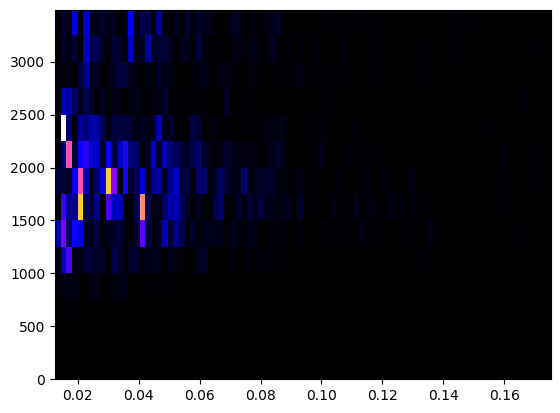

PyObject <matplotlib.image.AxesImage object at 0x7f3e45d2a390>

In [63]:
tupapa=transpose(sp1.power)

fi,fo=sp1.freq[1], sp1.freq[end]
ti,to=sp1.time[1], sp1.time[end]

imshow(tupapa,origin="lower", extent=[ti,to, fi,fo], aspect="auto", cmap="gnuplot2")

In [68]:
stft1=stft(lfp1, fs=freq);


In [77]:
astft1=abs2.(stft1);

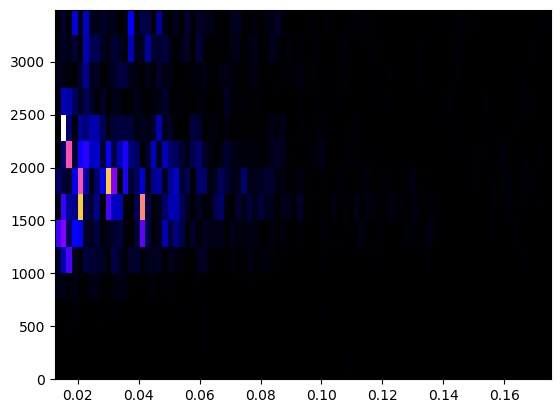

PyObject <matplotlib.image.AxesImage object at 0x7f3e46410b50>

In [78]:
imshow(transpose(astft1), origin="lower", extent=[ti,to, fi,fo], aspect="auto", cmap="gnuplot2")